In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Supplementary material</h1>
<h2 style="text-align: center;">Using network-only Bayes classifier (nBC) as relational model</h2>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

import os
from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from org.gesis.inference.inference import get_inference_summary_fn
from utils import viz
from utils import io
from utils import prediction
from utils import estimator
from utils import empirical

<h2>Parameters</h2>

In [3]:
kind = "all"                    # network generative model type
sampling = "all"                # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
DATAPATH = "../data/"           # directory to store networks (gpickle)
OUTPUT = "../results-batch/"    # directory to store results
OUTPUT_MIXED_EFFECTS = os.path.join(OUTPUT, 'mixed_effects')
OUTPUT_SUMMARY = get_inference_summary_fn(OUTPUT, kind, LC, RC, CI, sampling)
OUTPUT_PLOTS = os.path.join(OUTPUT, 'plots')
LATEX = True
MODEL = 'BAH'
SMALLP = 0.3

<h2>Load results</h2>

In [4]:
df_results_original = io.load_csv(OUTPUT_SUMMARY)
df_results_original.head()

,kind,dataset,N,m,density,B,H,Hmm,HMM,i,...,EEcp10,EEcp11,EEcp01,SEp0,SEp1,SEcp00,SEcp11,SEcpDiff,SEcpSum,SE
0,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,-0.004287,0.004287,0.002496,0.000052,0.000052,6.232411e-06,0.000018,-0.000012,0.000025,0.000077
1,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.001172,-0.001172,0.002529,0.000026,0.000026,6.396694e-06,0.000001,0.000005,0.000008,0.000034
2,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.025567,-0.025567,-0.000672,0.000252,0.000252,4.513109e-07,0.000654,-0.000653,0.000654,0.000906
3,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.037696,-0.037696,0.030464,0.000183,0.000183,9.280391e-04,0.001421,-0.000493,0.002349,0.002532
4,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,-0.004075,0.004075,0.000640,0.000061,0.000061,4.101122e-07,0.000017,-0.000016,0.000017,0.000078


<h2>Plotting setup</h2>

In [5]:
viz.plot_setup(LATEX)
df_results, columns = viz.latex_compatible_dataframe(df_results_original, LATEX)    
df_results.head() 

,kind,dataset,N,m,density,B,H,Hmm,HMM,i,...,EEcp\_{10},EEcp\_{11},EEcp\_{01},SEp\_{0},SEp\_{1},SEcp\_{00},SEcp\_{11},SEcpDiff,SEcpSum,SE
0,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,-0.004287,0.004287,0.002496,0.000052,0.000052,6.232411e-06,0.000018,-0.000012,0.000025,0.000077
1,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.001172,-0.001172,0.002529,0.000026,0.000026,6.396694e-06,0.000001,0.000005,0.000008,0.000034
2,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.025567,-0.025567,-0.000672,0.000252,0.000252,4.513109e-07,0.000654,-0.000653,0.000654,0.000906
3,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.037696,-0.037696,0.030464,0.000183,0.000183,9.280391e-04,0.001421,-0.000493,0.002349,0.002532
4,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,-0.004075,0.004075,0.000640,0.000061,0.000061,4.101122e-07,0.000017,-0.000016,0.000017,0.000078


<div style="text-align:center;"><h2>RQ1: Network Structure</h2></div>

In [ ]:
N = 2000
df_rq1 = df_results.query("kind=='BAH' & dataset=='-' & sampling=='nodes' & N==@N")
df_rq1.head()

In [ ]:
fn = os.path.join(OUTPUT_PLOTS, 'SM_R1.pdf')
viz.plot_rocauc_vs_pseeds_per_H_B_N_m(df_rq1, columns, fn=fn)

<h3>Regression to the mean global performance</h3>

In [ ]:
y_observed = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"y_observed.pickle"))
fe_params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"fe_params.pickle"))
random_effects = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"random_effects.pickle"))
mdf = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"mdf.pickle"))
params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"params.pickle"))
X = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"X.pickle"))
Y = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Y.pickle"))
Z = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Z.pickle"))

In [ ]:
mdf.summary()

In [ ]:
fn = None
viz.plot_fixed_effects(fe_params, fn)

In [ ]:
fn = None
viz.plot_random_effects(random_effects, params['group_vars'], fn)

In [ ]:
fn = None
viz.plot_fitted_line(mdf, y_observed, fn)

In [ ]:
fn = None
viz.plot_prediction(X, Y, Z, fe_params, random_effects, fn)

<h3>Prediction on Empirical Networks</h3>

Datasets

In [ ]:
df_evalues = empirical.load_evalues(OUTPUT)
df_empirical = empirical.get_summary_datasets(DATAPATH, df_evalues, output=OUTPUT)
df_empirical

In [ ]:
fn = os.path.join(OUTPUT_PLOTS, 'SM_empirical_power_law.pdf')
viz.plot_empirical_degree_distributions(DATAPATH, bestk=True, fn=fn)

Prediction using Mixed-Effects

In [ ]:
sampling = 'nodes'
tmp = df_results.query("kind=='empirical' & sampling==@sampling").copy()
tmp = prediction.setup(tmp)
df_prediction = prediction.predict_allrows(tmp, mdf, params)
del(tmp)

In [ ]:
sampling = 'nodes'
df_realworld = df_results.query("dataset!='-' & sampling==@sampling").copy()
df_realworld = df_realworld.append(df_prediction[df_realworld.columns], ignore_index=True)

df_realworld.loc[:, 'B'] = df_realworld.B.round(2)
df_realworld.loc[:, 'H'] = df_realworld.H.round(2)
df_realworld.sample(5)

In [ ]:
fn = None 
viz.plot_model_vs_data(df_realworld, fn) 

<div style="text-align:center;"><h2>RQ2: Sample Structure</h2></div>

In [365]:
N = 2000
m = 4
H = [0.2, 0.8]
B = [0.1, 0.5]

df_rq2 = df_results.query("kind==@MODEL & N==@N & m==@m & H in @H & B in @B & pseeds<=@SMALLP & sampling!='neighbors'")
df_rq2.shape


(3190, 49)

In [366]:
#sampling = 'all'
#fn = os.path.join(OUTPUT_PLOTS, 'SM_R2_SEmin_SEcpSum_leqP{}_<sampling>.pdf'.format(int(100*SMALLP)))
#viz.plot_estimation_errors_per_H_B_rocauc_sampling(df_rq2, columns, 'SE', 'rocauc', sampling, fn)

nodes
../results-batch/plots/SM_R2_SEmin_SEcpSum_leqP30_nodes.pdf saved!


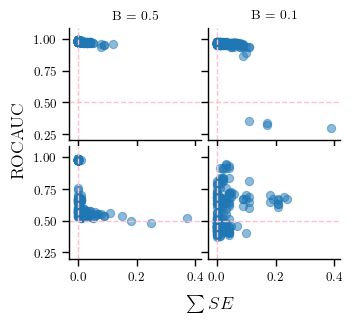

degree
../results-batch/plots/SM_R2_SEmin_SEcpSum_leqP30_degree.pdf saved!


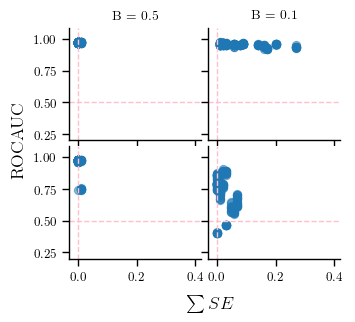

partial\_crawls
../results-batch/plots/SM_R2_SEmin_SEcpSum_leqP30_partialcrawls.pdf saved!


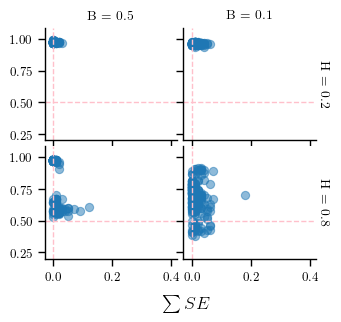

nedges
../results-batch/plots/SM_R2_SEmin_SEcpSum_leqP30_nedges.pdf saved!


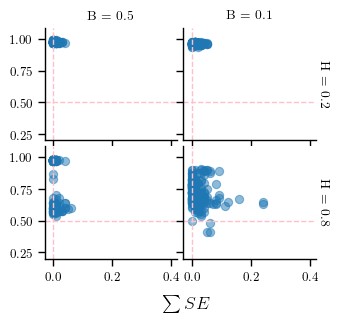

In [367]:
### data
tmp_data = df_rq3.copy()
tmp_data.loc[:,'SE'] = tmp_data.SE.apply(lambda x: round(x,2))
tmp_data.loc[:,'ROCAUC'] = tmp_data.ROCAUC.apply(lambda x: round(x,2))
tmp_data.loc[:,'bias'] = tmp_data.bias.apply(lambda x: round(x,2))

### setup
for sampling in tmp_data.sampling.unique():
    fn = os.path.join(OUTPUT_PLOTS, 'SM_R2_SEmin_SEcpSum_leqP{}_{}.pdf'.format(int(100*SMALLP),sampling))
    x = 'SE'
    y = 'rocauc'
    hue = None
    col = 'B'
    row = 'H'
    ylabel = sampling in ['nodes','degree']

    viz.new_plot_estimation_errors_per_H_B_rocauc_sampling(tmp_data, columns,
                                                   col, row, hue, x, y, sampling, 
                                                   ylabel=(ylabel,not ylabel), legend=not ylabel, fn=fn)

<div style="text-align:center;"><h2>RQ3: Direction of bias</h2></div>

In [368]:
N = 2000
m = 4
H = [0.2, 0.8]
B = [0.1, 0.5]


df_rq3 = df_results.query("kind==@MODEL & N==@N & m==@m & H in @H &  B in @B & pseeds <= @SMALLP & sampling != 'neighbors'")
df_rq3.head()

,kind,dataset,N,m,density,B,H,Hmm,HMM,i,...,EEcp\_{10},EEcp\_{11},EEcp\_{01},SEp\_{0},SEp\_{1},SEcp\_{00},SEcp\_{11},SEcpDiff,SEcpSum,SE
2302,BAH,-,2000,4,0.003994,0.1,0.2,0.2,0.2,3.0,...,-0.082302,0.082302,-0.117267,0.000732,0.000732,0.013751,0.006774,0.006978,0.020525,0.021257
2303,BAH,-,2000,4,0.003994,0.1,0.2,0.2,0.2,3.0,...,-0.082302,0.082302,-0.168796,0.002177,0.002177,0.028492,0.006774,0.021719,0.035266,0.037443
2304,BAH,-,2000,4,0.003994,0.1,0.2,0.2,0.2,3.0,...,0.001581,-0.001581,-0.052277,0.000033,0.000033,0.002733,0.000003,0.002730,0.002735,0.002768
2305,BAH,-,2000,4,0.003994,0.1,0.2,0.2,0.2,3.0,...,0.021563,-0.021563,-0.066837,0.000178,0.000178,0.004467,0.000465,0.004002,0.004932,0.005110
2307,BAH,-,2000,4,0.003994,0.1,0.2,0.2,0.2,3.0,...,-0.023823,0.023823,0.155597,0.003188,0.003188,0.024210,0.000568,0.023643,0.024778,0.027966


<h3>Performance Bias</h3>

In [369]:
#sampling = 'all'
#fn = os.path.join(OUTPUT_PLOTS, 'SM_R3_bias_rocauc_SSE_leqP{}_<sampling>.pdf'.format(int(100*SMALLP)))
#viz.plot_estimation_errors_per_H_B_rocauc_sampling(df_rq3, columns, 'bias', 'rocauc', sampling, fn)

nodes
../results-batch/plots/SM_R3_bias_rocauc_SSE_leqP30_nodes.pdf saved!


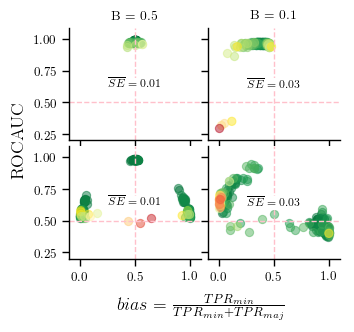

degree
../results-batch/plots/SM_R3_bias_rocauc_SSE_leqP30_degree.pdf saved!


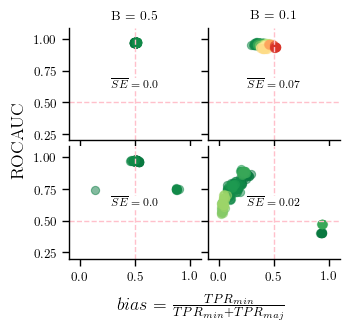

partial\_crawls
../results-batch/plots/SM_R3_bias_rocauc_SSE_leqP30_partialcrawls.pdf saved!


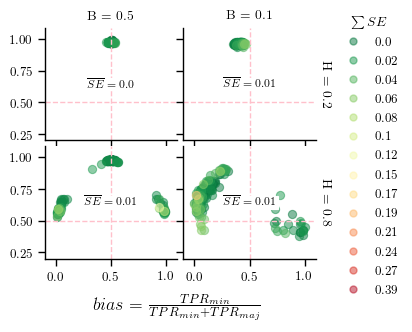

nedges
../results-batch/plots/SM_R3_bias_rocauc_SSE_leqP30_nedges.pdf saved!


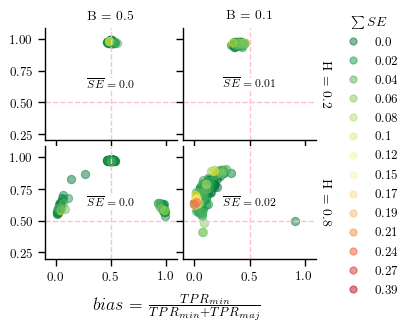

In [370]:
### data
tmp_data = df_rq3.copy()
tmp_data.loc[:,'SE'] = tmp_data.SE.apply(lambda x: round(x,2))
tmp_data.loc[:,'ROCAUC'] = tmp_data.ROCAUC.apply(lambda x: round(x,2))
tmp_data.loc[:,'bias'] = tmp_data.bias.apply(lambda x: round(x,2))

### setup
for sampling in tmp_data.sampling.unique():
    fn = os.path.join(OUTPUT_PLOTS, 'SM_R3_bias_rocauc_SSE_leqP{}_{}.pdf'.format(int(100*SMALLP),sampling))
    x = 'bias'
    y = 'rocauc'
    hue = 'SE'
    col = 'B'
    row = 'H'
    ylabel = sampling in ['nodes','degree']

    viz.new_plot_estimation_errors_per_H_B_rocauc_sampling(tmp_data, columns,
                                                   col, row, hue, x, y, sampling, 
                                                   ylabel=(ylabel,not ylabel), legend=not ylabel, fn=fn)